<a href="https://colab.research.google.com/github/DilnaJoseph/placement_predictor/blob/main/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [63]:
# Loading the data
data = pd.read_csv('placement_data.csv')

In [64]:
# analyzing the data
print(f"\nDataset Shape: {data.shape}")
print(f"\nColumn Names and Types:\n{data.dtypes}")
print(f"\nMissing Values:\n{data.isnull().sum()}")
print(data.describe())
print("\n")
print(data['PlacementStatus'].value_counts())


Dataset Shape: (10000, 12)

Column Names and Types:
StudentID                      int64
CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities     object
PlacementTraining             object
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus               object
dtype: object

Missing Values:
StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64
         StudentID          CGPA   Internships      Projects  \
count  10000.00000  100

In [65]:
# data cleaning
data['PlacementStatus'] = data['PlacementStatus'].apply(lambda x: 1 if x == 'Placed' else 0)

binary_cols = ['ExtracurricularActivities', 'PlacementTraining']
for col in binary_cols:
    if col in data.columns:
        data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

data

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,9997,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,9998,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,9999,8.9,0,3,2,87,4.8,1,1,71,85,1


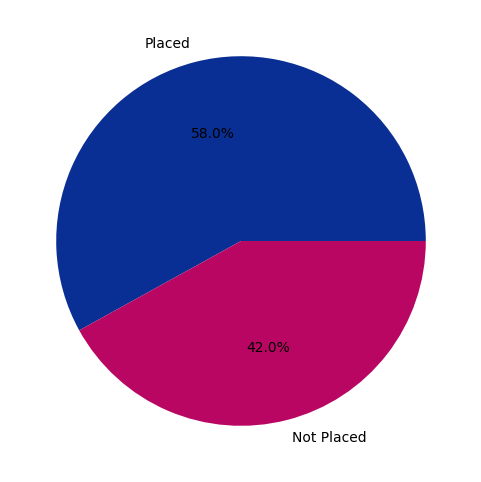

In [66]:
plt.figure(figsize=(6, 6))
# Placement Distribution
plt.pie(data['PlacementStatus'].value_counts(),
               labels=['Placed', 'Not Placed'],
               autopct='%1.1f%%', # display decimal round off to 1 place
               colors=['#0a2f94', '#b80662'])
plt.show()




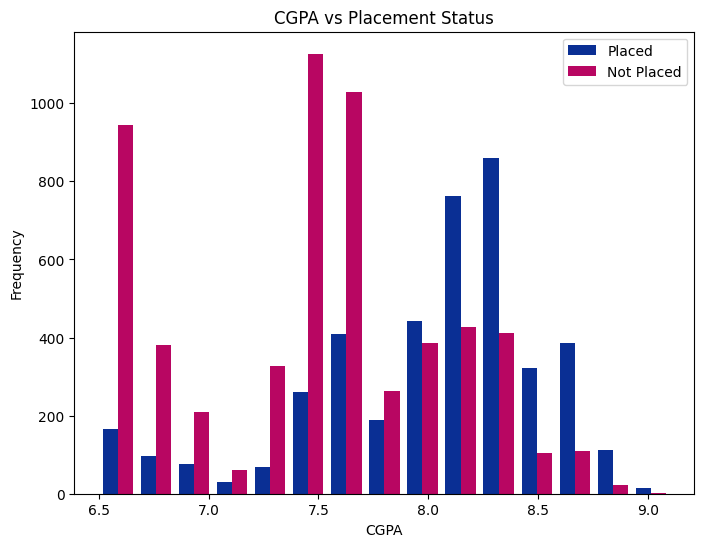

In [67]:
plt.figure(figsize=(8, 6))
plt.hist(
    [data[data['PlacementStatus'] == 1]['CGPA'], data[data['PlacementStatus'] == 0]['CGPA']],
    bins=15,
    label=['Placed', 'Not Placed'],
    color=['#0a2f94', '#b80662']
)
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('CGPA vs Placement Status')
plt.legend()
plt.show()


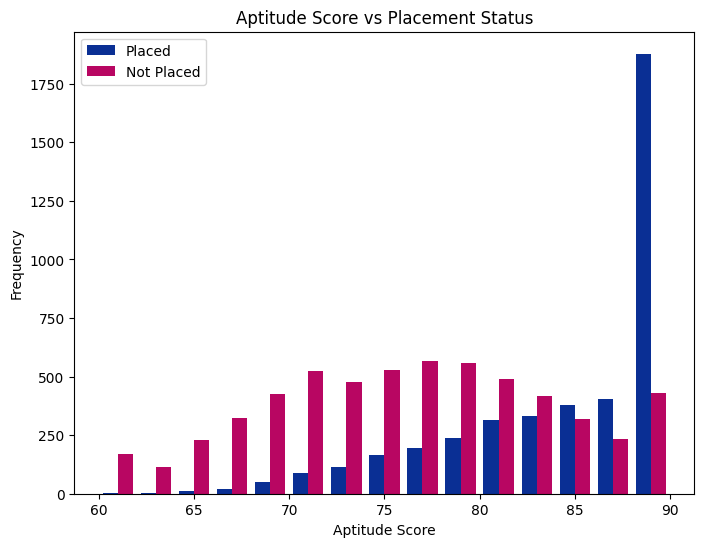

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(
    [data[data['PlacementStatus'] == 1]['AptitudeTestScore'],
     data[data['PlacementStatus'] == 0]['AptitudeTestScore']],
    bins=15,
    label=['Placed', 'Not Placed'],
    color=['#0a2f94', '#b80662']
)
plt.xlabel('Aptitude Score')
plt.ylabel('Frequency')
plt.title('Aptitude Score vs Placement Status')
plt.legend() # the labels for violet and purple
plt.show()


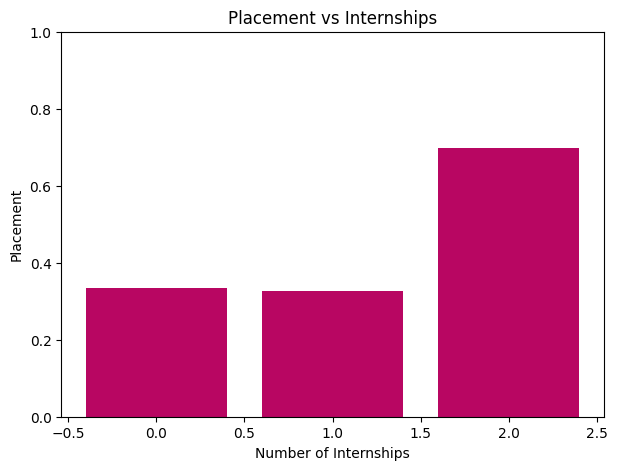

In [69]:
internship_placement = data.groupby('Internships')['PlacementStatus'].mean()

plt.figure(figsize=(7, 5))
plt.bar(internship_placement.index, internship_placement.values, color='#b80662')
plt.xlabel('Number of Internships')
plt.ylabel('Placement')
plt.title('Placement vs Internships')
plt.ylim(0, 1) # set limits on y axis
plt.show()


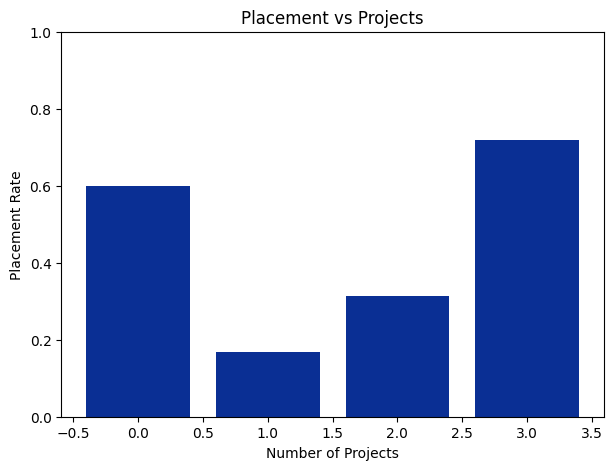

In [79]:
projects_placement = data.groupby('Projects')['PlacementStatus'].mean()

plt.figure(figsize=(7, 5))
plt.bar(projects_placement.index, projects_placement.values, color='#0a2f94')
plt.xlabel('Number of Projects')
plt.ylabel('Placement Rate')
plt.title('Placement vs Projects')
plt.ylim(0, 1)
plt.show()


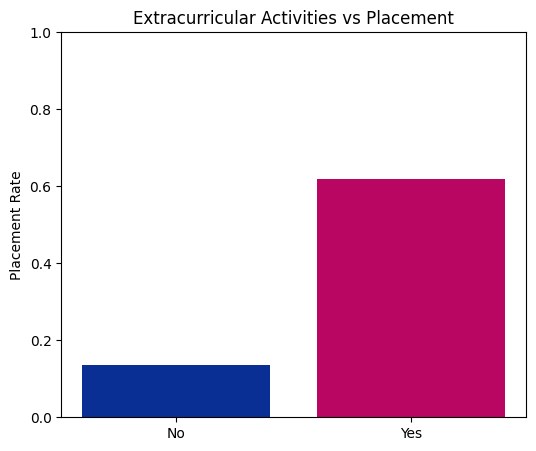

In [80]:
extra_placement = data.groupby('ExtracurricularActivities')['PlacementStatus'].mean()

plt.figure(figsize=(6, 5))
plt.bar(['No', 'Yes'], extra_placement.values, color=['#0a2f94', '#b80662'])
plt.ylabel('Placement Rate')
plt.title('Extracurricular Activities vs Placement')
plt.ylim(0, 1)
plt.show()


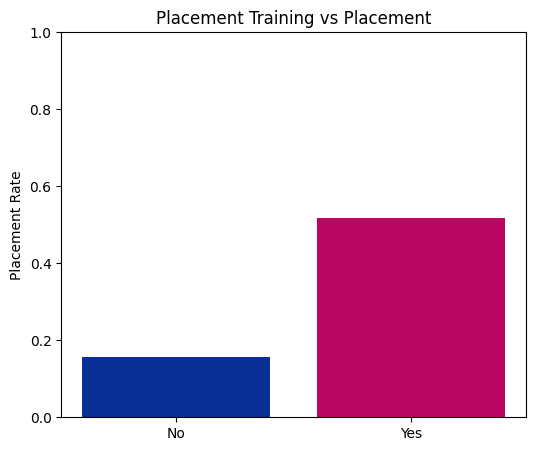

In [81]:
training_placement = data.groupby('PlacementTraining')['PlacementStatus'].mean()

plt.figure(figsize=(6, 5))
plt.bar(['No', 'Yes'], training_placement.values, color=['#0a2f94', '#b80662'])
plt.ylabel('Placement Rate')
plt.title('Placement Training vs Placement')
plt.ylim(0, 1)
plt.show()


In [73]:
# some observations
print(f"\n1. Average CGPA - Placed: {data[data['PlacementStatus']==1]['CGPA'].mean():.2f} | Not Placed: {data[data['PlacementStatus']==0]['CGPA'].mean():.2f}")
print(f"2. Average Aptitude Score - Placed: {data[data['PlacementStatus']==1]['AptitudeTestScore'].mean():.2f} | Not Placed: {data[data['PlacementStatus']==0]['AptitudeTestScore'].mean():.2f}")
print(f"3. Placement Training Impact: {training_placement[1]*100:.1f}% (with) vs {training_placement[0]*100:.1f}% (without)")
print(f"4. Extracurricular Activities Impact: {extra_placement[1]*100:.1f}% (with) vs {extra_placement[0]*100:.1f}% (without)")




1. Average CGPA - Placed: 8.02 | Not Placed: 7.47
2. Average Aptitude Score - Placed: 84.46 | Not Placed: 75.83
3. Placement Training Impact: 51.6% (with) vs 15.6% (without)
4. Extracurricular Activities Impact: 62.0% (with) vs 13.7% (without)


In [74]:
X = data[['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
          'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities',
          'PlacementTraining', 'SSC_Marks', 'HSC_Marks']]
y = data['PlacementStatus']

# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
lr = LogisticRegression(random_state=42, max_iter=1000)

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr_proba = lr.predict_proba(X_test_scaled)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_pred_lr_proba)
cv_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5)

print("Logistic Regression")
print(f"Accuracy: {acc_lr*100:.2f}%")
print(f"ROC-AUC: {roc_lr:.4f}")
print(f"CV Score: {cv_lr.mean()*100:.2f}% (+/- {cv_lr.std()*100:.2f}%)")

Logistic Regression
Accuracy: 80.85%
ROC-AUC: 0.8837
CV Score: 79.67% (+/- 0.76%)


In [76]:

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,          # to prevent overfitting
    min_samples_leaf=10
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt_proba)
cv_dt = cross_val_score(dt, X_train, y_train, cv=5)

print("Decision Tree")
print(f"Accuracy: {acc_dt*100:.2f}%")
print(f"ROC-AUC: {roc_dt:.4f}")
print(f"CV Score: {cv_dt.mean()*100:.2f}% (+/- {cv_dt.std()*100:.2f}%)")

Decision Tree
Accuracy: 78.05%
ROC-AUC: 0.8581
CV Score: 77.77% (+/- 1.06%)


In [77]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_leaf=5
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf_proba)
cv_rf = cross_val_score(rf, X_train, y_train, cv=5)

print("Random Forest")
print(f"Accuracy: {acc_rf*100:.2f}%")
print(f"ROC-AUC: {roc_rf:.4f}")
print(f"CV Score: {cv_rf.mean()*100:.2f}% (+/- {cv_rf.std()*100:.2f}%)")

Random Forest
Accuracy: 79.95%
ROC-AUC: 0.8812
CV Score: 79.55% (+/- 0.70%)


In [78]:
# model comparison
print(f"Logistic Regression Accuracy: {acc_lr*100:.2f}%")
print(f"Decision Tree Accuracy: {acc_dt*100:.2f}%")
print(f"Random Forest Accuracy: {acc_rf*100:.2f}%")

Logistic Regression Accuracy: 80.85%
Decision Tree Accuracy: 78.05%
Random Forest Accuracy: 79.95%
